# Neural Networks
A Neural Network in a powerful classification tool and one of the main algorithms that has got so many people excited about Machine Learning as of late. It takes inspiration from the hierarchical structure of the visual processing systems found in many animals including humans.<br>

It consists of layers of nodes, each node in each layer connected with each node in the previous layer with a weighted edge. The first layer is called the input layer, the last layer is called the output layer and any layers in between are called hidden layers.

![](nn.png)

Each node performs a very simple calculation. On a forward pass, where you feed in values into your input layer, each node calculates a weighted sum/linear combination of the nodes in the previous layer and applies an activation function. This is done sequentially through all the layers to get your output. The weights that each node uses to calculate its output are the parameters of the modela and they need to be optimised in order to the required output.

There are many different activation functions which have been shown to work including sigmoid, tanh, RELU, ELU and more are being researched everyday. RELU is the most commonly used one. But for classification problems, a sigmoid activation is used on the final layer to limit the output between 0 and 1 to represent a probability.

![](activation.png)

To train these networks, we use good old gradient descent. We feed in the input for each data point we have to calculate our output. We use our output to calculate the loss and then calculate the derivative of our loss w.r.t each weight in the network. We update our weights and we perform the whole process iteratively until we are satisfied with how low our loss is. Gradient descent applied to optimizing a neural network is commonly known as back-propagation.

What tends to happen with these networks one they are trained, especially when deeper architectures are used is that the first layers find low level features from the inputs. In the case of image processing, the neurons in the first layers activate for different types of lines and curves in the image while the the middle layers activate for different combinations of the lower level features such as basic shapes. The final layers activate for even higher level features such as (if we're tring to classify faces) ears, eyes and noses. And of course the neurons in the final layer activate for the higher level features we have which are different faces. This is exactly the kind of representations which are built up in biological visual processing systems.

![](nnfeaturevis.png)

First, we import the required libraries

In [12]:
%matplotlib notebook
import numpy as np
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import pandas as pd

Load the dataset into a Pandas dataframe, map our class labels into numerical values and shuffle our dataset

In [14]:
df = pd.read_csv('cancer_data.csv')
df[['diagnosis']] = df['diagnosis'].map({'M': 0, 'B': 1}) #map into numeric data
df = df.sample(frac=1) #shuffle dataset

Convert the required data from the dataframe into torch tensors so we can use them in our model

In [60]:
X = torch.Tensor(np.array(df[df.columns[2:-1]])) #pick our features from our dataset
Y = torch.LongTensor(np.array(df[['diagnosis']])) #select out label

Choose how many datapoints we will use as our training set and split intro train and test sets

In [16]:
m = 450

x_train = Variable(X[:m])
y_train = Variable(Y[:m])

x_test = Variable(X[m:])
y_test = Variable(Y[m:])

Define our Neural Network model using PyTorch's class interface. We define the Net class and inherit from torch.nn.module.<br>
We define the required linear combination operations in the initializer function.<br>
We define the forward-propagation, applying the linear combination operations defined in the initializer function followed by an activation function at each layer.<br>

In [17]:
class Net(torch.nn.Module):
    def __init__(self):
        super().__init__() #call parent class initializer
        self.h1 = torch.nn.Linear(30, 10) #input layer to size 10 hidden layer
        self.out = torch.nn.Linear(10, 1) #hidden layer to single output

    #define the forward propagation/prediction equation of our model
    def forward(self, x):
        x = self.h1(x) #linear combination
        x = F.relu(x) #activation
        x = self.out(x) #linear combination
        x = F.sigmoid(x) #activation
        return x

Define the training hyperparameters, costfunction and optimizer. Instantiate a model from the class we defined earlier.

In [64]:
#training hyper-parameters
no_epochs = 150 #number of epochs to train for
lr = 0.0005 #learning rate

mynet = Net() #instantiate model from class
criterion = torch.nn.BCELoss() #define cost criterion
optimizer = torch.optim.Rprop(mynet.parameters(), lr=lr) #choose optimizer

Define the axes which we will use to plot our loss function as we train. <br>
Define the function which we will use to train our model and train for the number of epochs specified by the no_epochs variable earlier

<IPython.core.display.Javascript object>


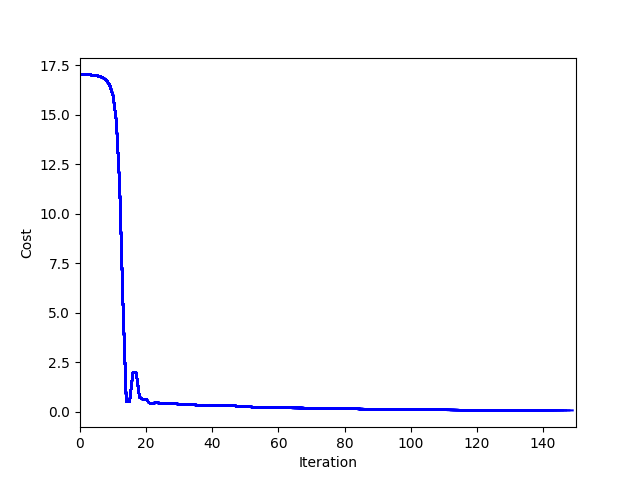

Epoch  1  Cost:  17.034587860107422
Epoch  2  Cost:  17.028715133666992
Epoch  3  Cost:  17.020715713500977
Epoch  4  Cost:  17.009790420532227
Epoch  5  Cost:  16.994461059570312
Epoch  6  Cost:  16.971263885498047
Epoch  7  Cost:  16.931543350219727
Epoch  8  Cost:  16.860109329223633
Epoch  9  Cost:  16.733715057373047
Epoch  10  Cost:  16.487091064453125
Epoch  11  Cost:  15.969324111938477
Epoch  12  Cost:  14.667195320129395
Epoch  13  Cost:  11.403045654296875
Epoch  14  Cost:  5.4340057373046875
Epoch  15  Cost:  0.49155840277671814
Epoch  16  Cost:  0.49155840277671814
Epoch  17  Cost:  1.961676001548767
Epoch  18  Cost:  1.961676001548767
Epoch  19  Cost:  0.7228049039840698
Epoch  20  Cost:  0.6161234974861145
Epoch  21  Cost:  0.6161234974861145
Epoch  22  Cost:  0.4253281354904175
Epoch  23  Cost:  0.4245036244392395
Epoch  24  Cost:  0.4361858665943146
Epoch  25  Cost:  0.4285655617713928
Epoch  26  Cost:  0.4078475534915924
Epoch  27  Cost:  0.40937215089797974
Epoch  28

In [65]:
costs = []
fig = plt.figure()
ax = fig.add_subplot(111)
ax.set_xlabel('Iteration')
ax.set_ylabel('Cost')
ax.set_xlim(0, no_epochs)

def train(no_epochs, lr):
    for epoch in range(no_epochs):
        #forward propagate - calulate our hypothesis
        h = mynet.forward(x_train)

        #calculate, plot and print cost
        cost = criterion(h, y_train)
        costs.append(cost.data[0])
        ax.plot(costs, 'b')
        fig.canvas.draw()
        print('Epoch ', epoch+1, ' Cost: ', cost.data[0])

        #backpropagate + gradient descent step
        optimizer.zero_grad() #set gradients to zero
        cost.backward() #backpropagate to calculate derivatives
        optimizer.step() #update our weights

train(no_epochs, lr)

Calulate the accuracy of our model on our test set

In [66]:
test_h = mynet.forward(x_test) #predict values for out test set
test_h.data.round_() #round output probabilities to give us discrete predictions
correct = test_h.data.eq(y_test.data) #perform element-wise equality operation
accuracy = torch.sum(correct)/correct.shape[0] #calculate accuracy
print('Test accuracy: ', accuracy)

Test accuracy:  0.957983193277311


Save the optimized model parameters

In [ ]:
torch.save(mynet.state_dict(), 'mynet_trained')